In [1]:
import math
import numpy as np

import cv2 as cv

import matplotlib.pyplot as plt

In [2]:
from src.load_images import set_database, get_dataset_path
from src.show_images import show_img, show_imgs

In [3]:
set_database("custom")

In [4]:
WAIT_TIME = 1000

In [5]:
colored_img = cv.imread(get_dataset_path("park.jpg"), cv.IMREAD_COLOR)
colored_img = cv.cvtColor(colored_img, cv.COLOR_BGR2RGB)

img_gray = cv.imread(get_dataset_path("park.jpg"), cv.IMREAD_GRAYSCALE)
img_gray = cv.cvtColor(img_gray, cv.COLOR_BGR2RGB)

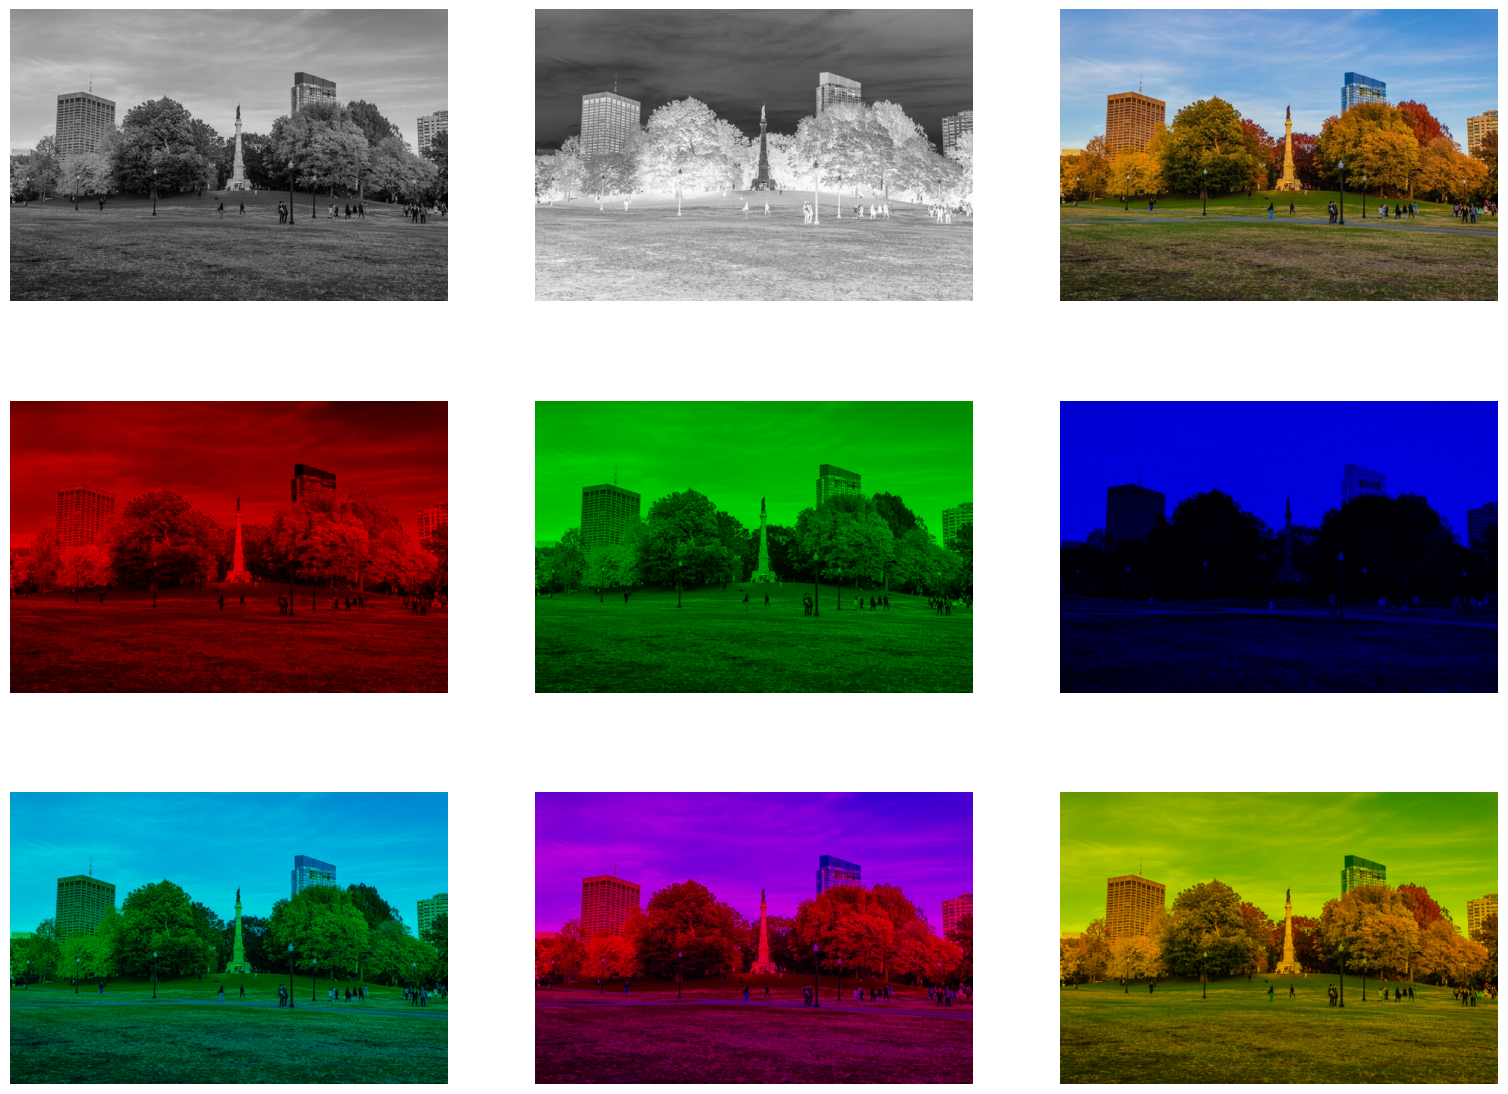

In [6]:
imgs = [img_gray, 255 - img_gray, colored_img]

for d in [0, 1, 2]:
    img = colored_img.copy()
    img[:,:,(d+1)%3] = 0
    img[:,:,(d+2)%3] = 0
    imgs += [img]

for d in [0, 1, 2]:
    img = colored_img.copy()
    img[:,:,d] = 0
    imgs += [img]

show_imgs(imgs, 3)

In [7]:
imgs = [img_gray, 255 - img_gray, colored_img]

for d in [0, 1, 2]:
    img = colored_img.copy()
    img[:,:,(d+1)%3] = 0
    img[:,:,(d+2)%3] = 0
    imgs += [img]

for d in [0, 1, 2]:
    img = colored_img.copy()
    img[:,:,d] = 0
    imgs += [img]

i = 0

cv.namedWindow("image", cv.WINDOW_NORMAL)
cv.imshow("image", cv.cvtColor(imgs[i], cv.COLOR_RGB2BGR))

key = -1
while cv.getWindowProperty('image', cv.WND_PROP_VISIBLE) >= 1 and not key == 27:
    cv.imshow("image", cv.cvtColor(imgs[i], cv.COLOR_RGB2BGR))
    cv.resizeWindow("image", imgs[i].shape[1], imgs[i].shape[0])
    i = (i + 1) % len(imgs)
    key = cv.waitKey(WAIT_TIME)

In [9]:
imgs = []

scales = [0.25, 0.5, 2, 4]
flags = [cv.INTER_AREA, cv.INTER_NEAREST, cv.INTER_LINEAR, cv.INTER_CUBIC, cv.INTER_LANCZOS4, cv.INTER_LINEAR_EXACT, cv.INTER_NEAREST_EXACT]

for flag in flags:
    for scale in scales:
        dsize = (int(scale * colored_img.shape[1]), int(scale * colored_img.shape[0]))
        imgs += [cv.resize(colored_img, dsize, interpolation=flag).copy()]

i = 0

cv.namedWindow("image", cv.WINDOW_NORMAL)
cv.imshow("image", cv.cvtColor(imgs[i], cv.COLOR_RGB2BGR))

key = -1
while cv.getWindowProperty('image', cv.WND_PROP_VISIBLE) >= 1 and not key == 27:
    cv.imshow("image", cv.cvtColor(imgs[i], cv.COLOR_RGB2BGR))
    cv.resizeWindow("image", imgs[i].shape[1], imgs[i].shape[0])
    i = (i + 1) % len(imgs)
    key = cv.waitKey(WAIT_TIME)
    
cv.destroyAllWindows()